<a href="https://colab.research.google.com/github/MYoussef885/Gold_Price_Prediction/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Data collection and processing

In [45]:
# loading the csv data to a pandas dataframe
gold_data = pd.read_csv('gold_price_data.csv')

In [46]:
# print first five rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,01/02/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,01/03/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,01/04/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,01/07/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,01/08/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [47]:
# print the last five rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,05/08/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,05/09/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,05/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [48]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [49]:
# getting some information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [50]:
# checking number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [51]:
# statistical measures of data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [52]:
gold_data = gold_data.drop(['Date'], axis=1)

In [53]:
correlation = gold_data.corr()

<Axes: >

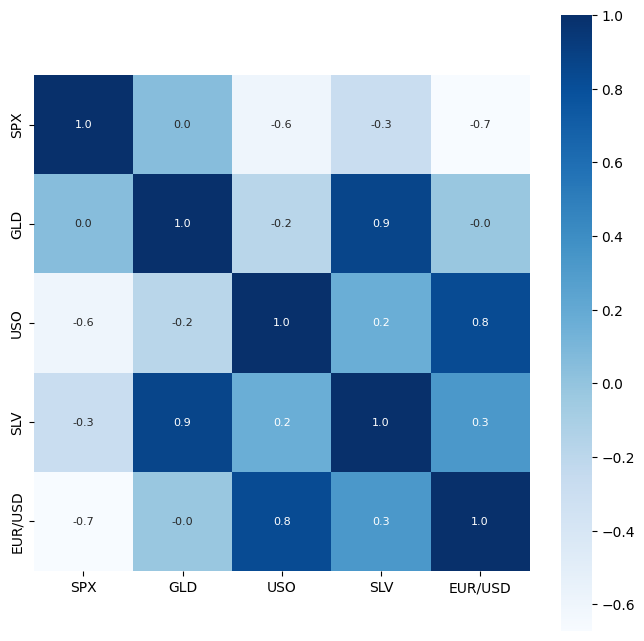

In [54]:
# constructing a heatmap tp understand the correlation
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap ='Blues')

In [55]:
# correlation values of GLD
#print(correlation['GLD'])

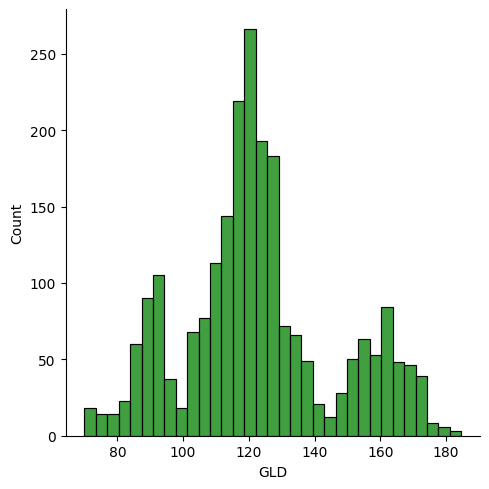

In [56]:
# checking the distribution of the GLD price
sns.displot(gold_data['GLD'], color='green')

Splitting the features and target

In [59]:
X = gold_data.drop(['GLD'], axis=1)
Y = gold_data['GLD']

In [60]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [61]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training and Test Data

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

Model Training:
Random Forest Regressor

In [63]:
regressor = RandomForestRegressor(n_estimators=100)

In [64]:
# training the model
regressor.fit(X_train, Y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [65]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [66]:
print(test_data_prediction)

[168.58869952  81.58980015 116.32399988 127.67430063 120.84300144
 154.62249846 149.99769744 125.97490052 117.43299897 126.06620071
 116.68760079 171.77200147 141.72979905 167.79319824 115.12320001
 117.66240035 138.59550261 170.15170083 160.36720298 160.64579962
 155.12500027 125.16230047 176.14870021 158.00230241 125.25740042
  94.02959975  78.13029995 120.68170013 119.09889951 167.59219897
  88.09270043 125.0691001   91.13190049 117.63249979 121.18049927
 136.18920095 115.44210117 115.48300073 148.02729915 107.33080154
 104.6705026   87.14139796 126.53220025 118.12529984 154.85969927
 119.56760039 108.31999961 108.08879829  93.1380004  127.00439825
  75.1085003  113.61679906 121.67870025 111.17889896 118.95509896
 120.37189927 158.98140007 166.76930068 147.11379636  85.98429874
  94.34870034  86.69999869  90.3266999  119.11210079 126.50650052
 127.71529987 170.05860022 122.29929954 117.19809906  98.59829998
 168.11790001 142.92359794 131.81230226 121.31570233 121.15449962
 119.83010

In [73]:
# R squared error
from sklearn.metrics import r2_score,root_mean_squared_error,mean_absolute_error
r2 = r2_score(Y_test, test_data_prediction)
rmse = root_mean_squared_error(Y_test, test_data_prediction)
mae = mean_absolute_error(Y_test, test_data_prediction)
print('R squared error:', r2)
print("rmse:",rmse)
print("mae:",mae)

R squared error: 0.9891364751587848
rmse: 2.393720027841157
mae: 1.3399964611790391


Compare the actual values and predicted values in a plot

In [68]:
Y_test = list(Y_test)

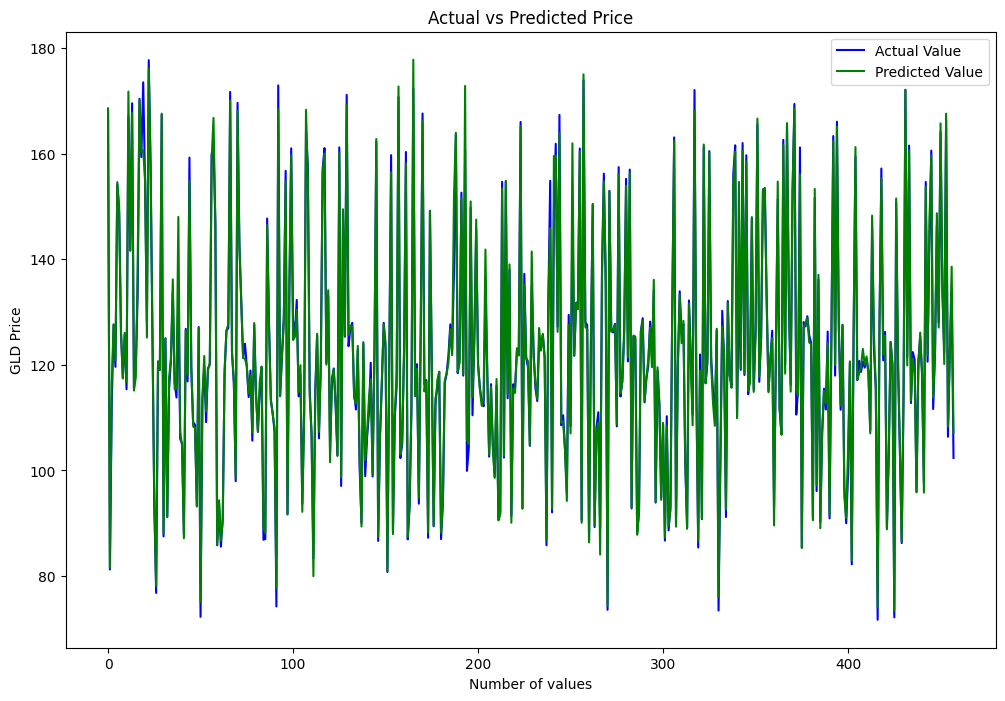

In [69]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

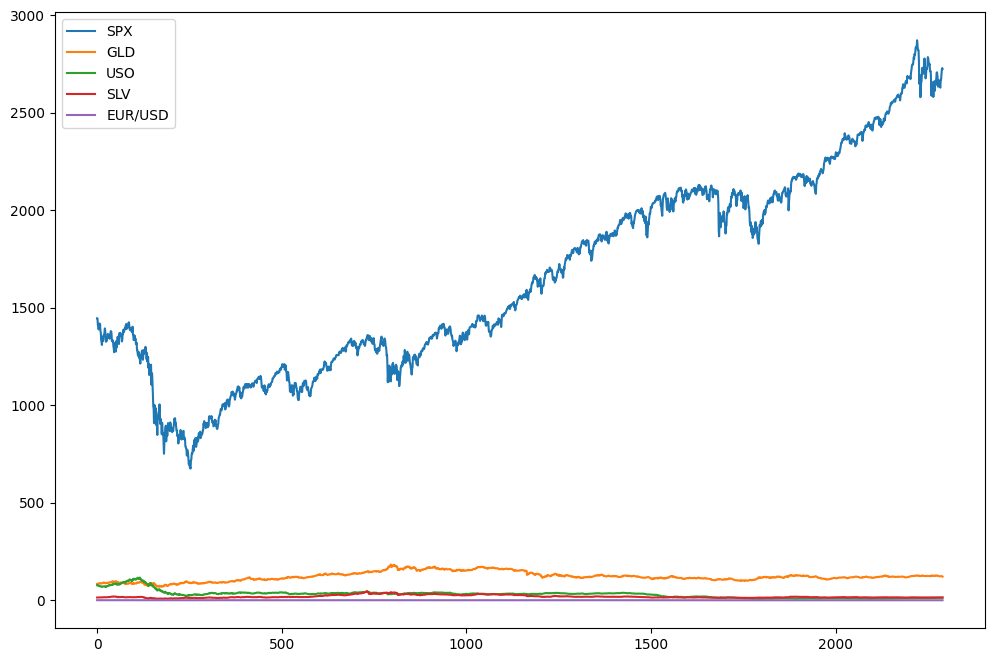

In [70]:
plt.rcParams['figure.figsize'] = [12, 8]#resize the plot
#plt.figure(figsize = (12, 8))

gold_data.plot()
plt.show()

In [71]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099
